In [2]:
import pandas as pd
from ast import literal_eval
import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DELTA = 0.7 ## RECOMMENDED
#S = 20*W ## RECOMMENDED

In [4]:
def return_PMI(row):
    fem_PMI = np.log( (row.female) / (P_fem * ((row.female + row.male)/N)))
    mal_PMI = np.log( (row.male) / (P_mal * ((row.female + row.male)/N)))
    return fem_PMI, mal_PMI

In [5]:
def return_cPMI(row): # should P_fem/N and word/W??? Look at more usecases of this in a context.
    fem_cPMI = np.log( row.female/N / (P_fem/N * ((row.female + row.male)/W_adj) + np.sqrt(P_fem) * np.sqrt(np.log(DELTA)/-2)))
    mal_cPMI = np.log( row.male/N / (P_mal/N * ((row.female + row.male)/W_adj) + np.sqrt(P_mal) * np.sqrt(np.log(DELTA)/-2)))
    return fem_cPMI, mal_cPMI

In [6]:
def return_cPMId(row):
    fem_cPMId = np.log( row.female / (Pd_fem * ((row.female + row.male)/D) + np.sqrt(Pd_fem) * np.sqrt(np.log(DELTA)/-2)))
    mal_cPMId = np.log( row.male / (Pd_mal * ((row.female + row.male)/D) + np.sqrt(Pd_mal) * np.sqrt(np.log(DELTA)/-2)))
    return fem_cPMId, mal_cPMId

In [7]:
dfs = []
for file in glob.glob("201*.csv"):
    dfs.append(pd.read_csv(file).drop(columns=["Unnamed: 0"]))

C:\Users\vanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\vanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\vanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
df = pd.concat(dfs)

In [9]:
df.dropna(subset=['Adjectives'], inplace=True) # somekind of mistake
df

,id,body,subreddit,to_type,NEL,Names,created_utc,sex,ethnicity,origin,...,given_name_used,family_name_used,full_name_used,nickname_used,Adjectives,Verbs,Nouns,Descriptors_parsed,Verbs_parsed,Relation
0,e2r5jeq,Thank you for your posts. I want to pull my ha...,politics,t1,Q1124,['Clinton'],NaN,male,white people,United States of America,...,False,True,False,False,"['bad', 'bad', 'horrible', 'entire', 'good', '...","['thank', 'want', 'pull', 'see', 'state', 'do'...","['post', 'hair', 'liberal', 'lot', 'thing', 'b...",[],[],['pobj']
1,e2r5jeq,Thank you for your posts. I want to pull my ha...,politics,t1,Q207,['GWB'],NaN,male,NaN,United States of America,...,False,False,False,True,"['bad', 'bad', 'horrible', 'entire', 'good', '...","['thank', 'want', 'pull', 'see', 'state', 'do'...","['post', 'hair', 'liberal', 'name', 'name', 'n...","['bad', 'that', 'bad', 'that', 'lot', 'only', ...","['be', 'be', 'do', 'elect', 'deregulate']","['dep', 'dep', 'dep', 'nsubjpass', 'appos', 'n..."
2,e2r5jeq,Thank you for your posts. I want to pull my ha...,politics,t1,Q22686,['Trump'],NaN,male,NaN,United States of America,...,False,True,False,False,"['bad', 'bad', 'horrible', 'entire', 'good', '...","['thank', 'want', 'pull', 'see', 'state', 'do'...","['post', 'hair', 'liberal', 'lot', 'thing', 'b...","['market', 'great', 'stock']","['bother', 'inherit']","['dep', 'dep']"
3,e2r5jeq,Thank you for your posts. I want to pull my ha...,politics,t1,Q76,"['Obama', 'Neocons']",NaN,male,African Americans,United States of America,...,False,True,False,False,"['bad', 'bad', 'horrible', 'entire', 'good', '...","['thank', 'want', 'pull', 'see', 'state', 'do'...","['post', 'hair', 'liberal', 'lot', 'thing', 'b...","['conservative', 'traditional']",[],"['pobj', 'pobj']"
4,e2r5jsd,I wonder if we’ll see [NAME] cry when [NAME] r...,politics,t3,Q22686,['Trump'],NaN,male,NaN,United States of America,...,False,True,False,False,[],"['wonder', 'see', 'cry', 'realize', 'record']","['name', 'name', 'name']",['when'],"['see', 'realize', 'record']","['dep', 'dep', 'dobj']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820229,ed5nl94,Washington state Democratic caucuses on March ...,democrats,t3,Q359442,['Sanders'],1546531378.0,male,Jewish people,United States of America,...,False,True,False,False,"['democratic', 'democratic']",[],"['state', 'caucus', 'name', '%', '%', 'state',...","['%', 'url', '%', '%']",[],"['ROOT', 'appos']"
820230,ed5nl94,Washington state Democratic caucuses on March ...,democrats,t3,Q6294,['Clinton'],1546531378.0,female,NaN,United States of America,...,False,True,False,False,"['democratic', 'democratic']",[],"['state', 'caucus', '%', 'name', '%', 'state',...","['%', '%', 'primary', 'state', 'democratic', '...",[],"['nmod', 'appos']"
820231,ed5o4y9,[NAME] also said that [NAME] needs a reason to...,democrats,t3,Q170581,['Nancy Pelosi'],1546531809.0,female,Italian American,United States of America,...,False,False,True,False,['political'],"['say', 'need', 'impeach', 'be', 'finish']","['name', 'name', 'reason', 'reason', 'report']","['also', 'reason']","['say', 'need']","['dep', 'nsubj']"
820232,ed5d89v,This shouldn't be ruled out for any president....,democrats,t3,Q22686,['Trump'],1546523198.0,male,NaN,United States of America,...,False,True,False,False,['potential'],"['rule', 'keep', 'pile']","['president', 'name', 'article', 'impeachment']","['article', 'potential']","[""'s""]",['dep']


In [10]:
#df['single_mention'] = df.groupby('id').transform(lambda group: len(group) == 1) # Figure out how to do this

In [11]:
singles = df.groupby('id').filter(lambda group: len(group) == 1) # look only at comments that comment on ONE politician -- easier?

In [12]:
#singles.dropna(subset=['Adjectives'], inplace=True)

In [13]:
singles['Adjectives'] = singles['Adjectives'].map(literal_eval)

In [14]:
singles['Adjectives'] = singles['Adjectives'].map(set)

In [15]:
fem_freq = {}
mal_freq = {}
for doc in singles[singles['sex'] == 'female'].Adjectives:
    for adj in doc: #ensure the same word isn't counted twice
        if adj.lower() in fem_freq.keys():
            fem_freq[adj.lower()] += 1
        else:
            fem_freq[adj.lower()] = 1
            mal_freq[adj.lower()] = 0

for doc in singles[singles['sex'] == 'male'].Adjectives:
    for adj in doc: #ensure the same word isn't counted twice
        if adj.lower() in mal_freq.keys():
            mal_freq[adj.lower() ] += 1
        else:
            mal_freq[adj.lower() ] = 1
            fem_freq[adj.lower() ] = 0

In [16]:
array = pd.DataFrame.from_dict([fem_freq,mal_freq])
array.index = ['female', 'male']

In [17]:
array_T = array.transpose()
array_T = array_T[(array_T.female > 2) & (array_T.male > 2)] # only look at words that appear at least 3 times in both sample sets.

In [18]:
(array_T == 0).sum()

female    0
male      0
dtype: int64

In [19]:
W_adj = sum(singles.Adjectives.map(len))

In [20]:
N = singles.shape[0]
P_fem = singles[singles['sex'] == 'female'].shape[0]
P_mal = singles[singles['sex'] == 'male'].shape[0]

In [21]:
array_T['PMI_female'], array_T['PMI_male'] = zip(*array_T.apply(lambda row: return_PMI(row), axis=1))

In [22]:
array_T['cPMI_female'], array_T['cPMI_male'] = zip(*array_T.apply(lambda row: return_cPMI(row), axis=1))

In [23]:
array_T

,female,male,PMI_female,PMI_male,cPMI_female,cPMI_male
vicious,132,1025,0.016602,-0.002051,-15.581620,-14.566124
progressive,3909,11345,0.825826,-0.176978,-12.193386,-12.162041
new,7085,54385,0.026817,-0.003374,-11.598690,-10.594736
more,16928,151441,-0.109803,0.013125,-10.727706,-9.570643
last,7052,62978,-0.108226,0.012949,-11.603359,-10.448040
...,...,...,...,...,...,...
infanticide,4,15,0.629242,-0.117302,-19.078127,-18.790521
amphibious,3,21,0.107945,-0.014444,-19.365809,-18.454049
hardened,3,22,0.067123,-0.008746,-19.365809,-18.407529
name].are,3,5,1.206557,-0.350917,-19.365809,-19.889134


In [24]:
#array_T.sort_values(by=['cPMI_male'], axis=0, ascending=False).iloc[:200]
#(array_T['cPMI_female'] - array_T['cPMI_male']).sort_values(ascending=False).iloc[:200]

In [25]:
singles['Adjectives'] = singles['Adjectives'].map(list)

In [26]:
entity_level = singles.groupby('NEL').agg({'Adjectives': list})
entity_level['Adjectives'] = entity_level['Adjectives'].apply(lambda x: [item for sublist in x for item in sublist])
entity_level['Adjectives'] = entity_level['Adjectives'].map(set)

In [27]:
mapper = singles[['NEL','sex']].drop_duplicates('NEL').set_index('NEL').to_dict()['sex']
entity_level['sex'] = entity_level.index.map(mapper)

In [28]:
d_fem_freq = {}
d_mal_freq = {}
for ent in entity_level[entity_level['sex'] == 'female'].Adjectives:
    for adj in ent: #ensure the same word isn't counted twice
        if adj.lower() in d_fem_freq.keys():
            d_fem_freq[adj.lower()] += 1
        else:
            d_fem_freq[adj.lower()] = 1
            d_mal_freq[adj.lower()] = 0

for ent in entity_level[entity_level['sex'] == 'male'].Adjectives:
    for adj in ent: #ensure the same word isn't counted twice
        if adj.lower() in d_mal_freq.keys():
            d_mal_freq[adj.lower() ] += 1
        else:
            d_mal_freq[adj.lower() ] = 1
            d_fem_freq[adj.lower() ] = 0

In [29]:
D = entity_level.shape[0]
Pd_fem = entity_level[entity_level['sex'] == 'female'].shape[0]
Pd_mal = entity_level[entity_level['sex'] == 'male'].shape[0]

In [30]:
d_array = pd.DataFrame.from_dict([d_fem_freq,d_mal_freq])
d_array.index = ['female', 'male']
d_array_T = d_array.transpose()
d_array_T = d_array_T[(d_array_T.female > 2) & (d_array_T.male > 2)] # only look at words that appear at least 3 times in both sample sets.

In [31]:
d_array_T['PMI_female'], d_array_T['PMI_male'] = zip(*d_array_T.apply(lambda row: return_PMI(row), axis=1))

In [33]:
d_array_T.sort_values(by=['PMI_female'], axis=0).iloc[:200]

,female,male,PMI_female,PMI_male
science,3,48,-0.645827,0.058462
diseased,3,45,-0.585202,0.054548
homegrown,3,45,-0.585202,0.054548
cooperative,5,74,-0.572624,0.053704
plentiful,3,44,-0.564149,0.053129
...,...,...,...,...
prophetic,4,33,-0.037237,0.004677
instructive,4,33,-0.037237,0.004677
catalan,4,33,-0.037237,0.004677
agitated,4,33,-0.037237,0.004677


In [34]:
most_fem_c = d_array_T.sort_values(by=['PMI_female'], axis=0, ascending=False).iloc[:300]
least_fem_c = d_array_T.sort_values(by=['PMI_female'], axis=0).iloc[:300]

In [35]:
most_female = array_T.sort_values(by=['PMI_female'], axis=0, ascending=False).iloc[:200]
least_female = array_T.sort_values(by=['PMI_female'], axis=0).iloc[:200]

In [36]:
most_female

,female,male,PMI_female,PMI_male,cPMI_female,cPMI_male
congresswoman,8,3,1.868932,-1.180196,-18.384980,-20.399959
sleeveless,70,28,1.850914,-1.133676,-16.215927,-18.166367
1/512,12,5,1.839080,-1.104689,-17.979515,-19.889134
misandrist,33,15,1.812693,-1.044064,-16.967914,-18.790521
pseudonymous,15,7,1.804394,-1.026045,-17.756372,-19.552661
...,...,...,...,...,...,...
sumptuous,3,6,1.088774,-0.286378,-19.365809,-19.706812
cack,3,6,1.088774,-0.286378,-19.365809,-19.706812
unfulfilling,4,8,1.088774,-0.286378,-19.078127,-19.419130
inbuilt,3,6,1.088774,-0.286378,-19.365809,-19.706812


In [37]:
for word in most_fem_c.index:
    print(word)

screechy
genderless
brownish
whack
sleeveless
compressed
carceral
husky
symmetric
corupt
headstrong
frumpy
dystopic
ro
undiluted
ditzy
incel
name].are
pair
thing-
frothing
kushy
medicated
cisgendered
toooo
freshmen
uncleared
congresswoman
misandrist
assume
footlong
empathic
injunctive
nit
dokey
openminded
aoc
gluttonous
collins
twelfth
prurient
wordthe
wynne
appease
ungracious
dawg
homely
dislike
smokey
pal
don
kamala
misandry
airhead
wiccan
poised
head
artsy
communicative
potus
copy
baaaad
make
proscribed
shillary
verge
10yr
alliterative
☑
overdone
librarian
unburdened
floral
raspy
admired
overqualified
feisty
overwrought
nsfw
samoan
stoke
topp
customized
finical
better
glorified
crowdpac
herein
caricature
emoji
their'll
nouveau
sunburnt
animalistic
dyed
warren
poc
vial
color
forfeit
disrespect
skanky
heeled
apathy
numbered
euclidean
purty
enlarged
smitten
disparagement
sparkly
offsite
mysogonistic
uncredited
widowed
catty
percieved
contraceptive
fugly
devolved
bossy
mortified
transex

# Super senses

In [39]:
dics = []
for file in glob.glob("adj-supersenses/manual_annotations/*.txt"):
    tag = file[44:-4]
    with open(file) as f:
        l = f.readlines()
        l = [word[:-1] for word in l]
        dics.append(pd.Series({word: tag for word in l}))
senses = pd.concat(dics)
senses.name = 'Senses'

In [41]:
most_fem_c.merge(senses, left_index=True, right_index=True)['Senses'].value_counts()


feeling          3
behavior         3
substance        2
social           2
quantity         1
perception       1
weather          1
body             1
mind             1
miscellaneous    1
Name: Senses, dtype: int64

In [42]:
least_fem_c.merge(senses, left_index=True, right_index=True)['Senses'].value_counts()

substance        5
behavior         4
temporal         3
mind             3
feeling          2
body             2
social           2
quantity         1
weather          1
miscellaneous    1
Name: Senses, dtype: int64

# NRC Lexica

In [55]:
emotions = pd.read_csv("nrc_lexica/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt",names=["word", "emotion", "association"], sep="\t")

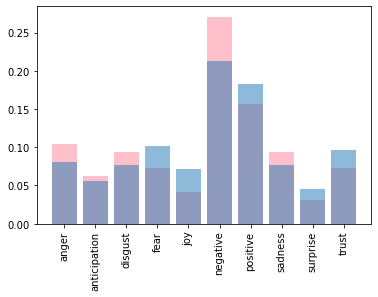

In [114]:
fem_emotions = {}
for word in emotions.emotion.unique():
    fem_emotions[word] = 0
mal_emotions = {}
for word in emotions.emotion.unique():
    mal_emotions[word] = 0
    
for word in most_fem_c.index:
    for emotion in emotions[(emotions['word'] == word) & (emotions['association'] == 1)]['emotion'].tolist():
        fem_emotions[emotion] += 1
for word in least_fem_c.index:
    for emotion in emotions[(emotions['word'] == word) & (emotions['association'] == 1)]['emotion'].tolist():
        mal_emotions[emotion] += 1

male_sum = sum(list(mal_emotions.values()))
fem_sum = sum(list(fem_emotions.values()))

plt.bar(fem_emotions.keys(), np.array(list(fem_emotions.values()))/fem_sum, color='pink')
plt.bar(mal_emotions.keys(), np.array(list(mal_emotions.values()))/male_sum, alpha=0.5)
plt.xticks(rotation=90)
plt.show()

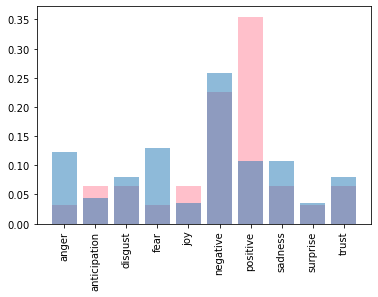

In [115]:
fem_emotions = {}
for word in emotions.emotion.unique():
    fem_emotions[word] = 0
mal_emotions = {}
for word in emotions.emotion.unique():
    mal_emotions[word] = 0
    
for word in most_female.index:
    for emotion in emotions[(emotions['word'] == word) & (emotions['association'] == 1)]['emotion'].tolist():
        fem_emotions[emotion] += 1
for word in least_female.index:
    for emotion in emotions[(emotions['word'] == word) & (emotions['association'] == 1)]['emotion'].tolist():
        mal_emotions[emotion] += 1

male_sum = sum(list(mal_emotions.values()))
fem_sum = sum(list(fem_emotions.values()))

plt.bar(fem_emotions.keys(), np.array(list(fem_emotions.values()))/fem_sum, color='pink')
plt.bar(mal_emotions.keys(), np.array(list(mal_emotions.values()))/male_sum, alpha=0.5)
plt.xticks(rotation=90)
plt.show()

In [116]:
senses = {}
for word in emotions.word.unique():
    senses[word] = emotions[(emotions['word'] == word) & (emotions['association'] == 1)]['emotion'].tolist()
most_female.index.map(senses)

Index([                             nan,                              nan,
                                    nan,                              nan,
                                    nan,                              nan,
                                     [],                              nan,
                                    nan,                              nan,
       ...
                                    nan,                              nan,
                                    nan,                              nan,
       ['anger', 'disgust', 'negative'],                              nan,
                                    nan,                              nan,
                                     [],                              nan],
      dtype='object', length=200)

In [117]:
least_female.index.map(senses)

Index([['anger', 'disgust', 'negative'],                              nan,
                                    nan,            ['positive', 'trust'],
                ['disgust', 'negative'],                               [],
                                    nan,                              nan,
                                    nan,                              nan,
       ...
                                    nan,                              nan,
                                    nan,                               [],
       ['anger', 'disgust', 'negative'],                              nan,
                           ['positive'],                               [],
                                    nan,                              nan],
      dtype='object', length=200)